In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Dataset
- Predict housing price based on size, num of bedrooms, num of floors, age of home

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           | 

In [2]:
def load_data(f_path):
    data = np.loadtxt(f_path, delimiter=',', skiprows=1)
    X = data[:,:4]
    y = data[:,4]
    return X, y

In [3]:
X_train, y_train = load_data('datasets/houses.txt')
print(f'{X_train.shape = }')
print(f'{y_train.shape = }')

X_train.shape = (99, 4)
y_train.shape = (99,)


#### Analysis

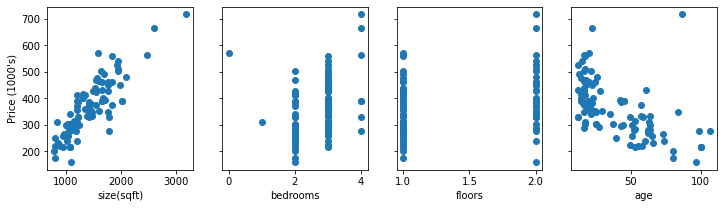

In [4]:
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

# We can see that
#     size and house age have strong influence on house price
#     num of bedrooms and num of floors have weak influence

#### Feature scaling - Normalization

$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j}$$ 

- In which
    - $(i)$: data point i-th
    - $j$: feature j-th

$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2 
\end{align}
$$

In [5]:
def normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)

    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)

    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return X_norm

In [6]:
X_train = normalize_features(X_train)

# 2. Model
#### Notation

$$x_j^{(i)}$$
+ $(i)$: data point i-th (m data points)
+ $j$: feature j-th (n features)

#### Linear Regression

$$\begin{split}
\hat{y}_i &= f_{w,b}(x^{(i)}) = w_0x_0^{(i)} + w_1x_1^{(i)} + \dots + w_{n-1}x_{n-1}^{(i)} + b \\
    &= w \cdot x^{(i)} + b
\end{split}$$

- In which
    + $x^{(i)}$: data point i-th, n features, vector size (n,) 
    + $w$: vector size (n,)
    + $b$: scalar

In [7]:
def f(X, w, b): 
    """
    predict using linear regression

    Args:
        x (ndarray): Shape (m,n) example with multiple features
        w (ndarray): Shape (n,) model parameters   
        b (scalar):             model parameter
    Returns:
        y_hat: predict, Shape (m,)
    """
    return np.dot(X, w) + b  

# 3. Cost function

#### MSE Cost function

$$\begin{split}
    J(w,b) &= \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (\hat{y}^{(i)} - y^{(i)})^2 \\
        &= \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2
\end{split}$$ 

- which:
    + $m$: dataset size

In [8]:
# Method 1: Loop
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    
    # number of training examples
    m = X.shape[0]

    # For each data point
    cost = 0.0
    for i in range(m):
        y_hat_i = f(X[i,:], w, b)
        cost += (y_hat_i - y[i])**2

    return cost/(2*m)

In [9]:
# Method 2: Vectorwise
def compute_cost_vector_wise(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]

    # calculate y_hat for all examples.
    y_hat = f(X, w, b)

    # calculate cost
    total_cost = (1/(2*m)) * np.sum((y_hat-y)**2)

    return total_cost

# 4. Gradient
#### Gradient of cost function
$$\begin{split}
\frac{\partial J(w,b)}{\partial w}  &= \frac{\partial \left( \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (w\cdot x_i + b - y_i)^2 \right)}{\partial w} \\
     &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (w\cdot x_i + b - y_i)  x_i \\
     &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}_i - y_i)  x_i \\ 
\end{split}$$

$$\begin{split}
\frac{\partial J(w,b)}{\partial b}  &= \frac{\partial \left( \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (w\cdot x_i + b - y_i)^2 \right)}{\partial b} \\
     &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (w\cdot x_i + b - y_i) \\
     &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}_i - y_i) \\ 
\end{split}$$

#### Update w, b
+ $\alpha$: Learning rate

$$\text{repeat until convergence: } \\
\begin{cases}
    w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \\
    b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}
\end{cases}$$

In [10]:
# Method 1: Loop
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """

    # (number of examples, number of features)
    m, n = X.shape

    # Compute Grad
    dj_dw = np.zeros((n,))
    dj_db = 0

    # For each data point
    for i in range(m):  
        y_hat_i = f(X[i], w, b)

        # For each feature
        for j in range(n):                         
            dj_dw[j] += (y_hat_i - y[i]) * X[i, j]
        dj_db += y_hat_i - y[i]

    return dj_dw / m, dj_db / m

In [11]:
# Method 2: Vectorwise
def compute_gradient_vector_wise(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """

    # (number of examples, number of features)
    m, n = X.shape

    # Compute Grad
    dj_dw = np.zeros((n,))
    dj_db = 0

    # For each data point
    for i in range(m):  
        y_hat_i = f(X[i, :], w, b) 

        dj_dw += (y_hat_i - y[i]) * X[i, :]
        dj_db += y_hat_i - y[i]

    return dj_dw / m, dj_db / m

In [12]:
# Method 3: matrix wise
def compute_gradient_matrix_wise(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """

    # (number of examples, number of features)
    m, n = X.shape

    # Calculate y_hat for all examples
    y_hat = f(X, w, b) 

    # Compute Grad
    dj_dw = 1./m * np.dot(y_hat - y, X)
    dj_db = 1./m * np.sum(y_hat - y)

    return dj_dw, dj_db

# 5. Train - Gradient Descent

In [13]:
import math
import copy

def fit(
        X, y,
        w_init, b_init,
        alpha, num_iters,
        cost_fn, gradient_fn): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    # cost and params history
    J_history = []
 
    # Gradient descent
    w = copy.deepcopy(w_init)
    b = b_init
    for i in range(num_iters):
        # Calculate the gradient
        dj_dw, dj_db = gradient_fn(X, y, w , b)     

        # Update w, b
        w -= alpha * dj_dw                            
        b -= alpha * dj_db                            

        # Save cost J at each iteration
        if i<100000:
            J_history.append( cost_fn(X, y, w , b) )

        # Print
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.3f} ")
 
    return w, b, J_history

In [14]:
m, n = X_train.shape

initial_w = np.random.random((n,))
initial_b = np.random.random()

# initial_w = np.zeros((n,))
# initial_b = 0.

w_final, b_final, J_hist = fit(
    X=X_train , y=y_train,
    w_init=initial_w, b_init=initial_b,
    alpha=1.75e-3, num_iters=10000,
    cost_fn=compute_cost_vector_wise, gradient_fn=compute_gradient_matrix_wise)
print(f"\tFinal: (w,b): ({w_final},{b_final:8.4f})")

Iteration    0: Cost 70740.658 
Iteration 1000: Cost 2793.180 
Iteration 2000: Cost 455.764 
Iteration 3000: Cost 275.373 
Iteration 4000: Cost 236.065 
Iteration 5000: Cost 224.411 
Iteration 6000: Cost 220.818 
Iteration 7000: Cost 219.706 
Iteration 8000: Cost 219.361 
Iteration 9000: Cost 219.255 
	Final: (w,b): ([110.32515055 -21.14868917 -32.57542895 -38.01615381],363.1561)


# 6. Inference

#### Inference

In [15]:
np.random.seed(3)
for x in range(3):
    i = np.random.randint(0, X_train.shape[0])
    y_hat = f(X_train[i], w_final, b_final)
    print(f'y[{i}] = {y_train[i]}, y_hat[{i}] = {y_hat}')

y[24] = 304.0, y_hat[24] = 295.59563885562727
y[3] = 540.0, y_hat[3] = 492.0981786091512
y[56] = 350.0, y_hat[56] = 339.146184831762


#### R2 Score

In [16]:
from sklearn.metrics import r2_score

y_hat = f(X_train, w_final, b_final)
r2 = r2_score(
    y_true=y_train,
    y_pred=y_hat)
print(f'R2 = {r2:.3f}')

R2 = 0.960
